# Programming Lab 1 - Data Science

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

In [612]:
# Student Name
name = "Austin Martin"   # <== fill in
assert name != ""
print(name+'\'s Lab 1 submission')

Austin Martin's Lab 1 submission


# Instructions

## Section Code
* Complete the four sections below. They roughly correspond to Activities 1-4, respectively.

* Add **all** your `import` packages only within the top `Load packages` block.

* Break large chucks of code into consecutive smaller code blocks. Functionally decompose code as needed. Strive for organized, clean and readable code.

* Comment your work: either within the code or as text blocks above.

* For each task, provide all needed code. Demonstrate completetion of each task with a tangible output/result, either `display`/`print` or a graph.

## Section Report
* For each section, complete the mini-report. Answer the question with **complete sentences**, graphs, tables, and/or code blocks with `print`.

* Replace the *Lorem ipsum* text with your answers (but leave the *Student Response* header).  

* Answer each Report question individually with at least one text block.

* **You can (and should) intersperse code blocks alongside text blocks to demonstrate your answers.**

* **Take pride in visual appeal of your answers.** Format your responses nicely. Review the markup tutorial in `Lecture 00-Getting Started`. Data science work is often presented to less-technical audiences. Imagine you need to help a manager understand your work & results.

* If you use subsection headers, makes sure to use #### or smaller to stay within the `Student Response` section.

***
# Load packages
***

Any additional packages you need for this lab should be added here.

**DO NOT** import packages anywhere else

In [649]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from urllib import request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone
from itertools import combinations

# add more libraries as needed

***
# Dataset
***

In [614]:
# URL for fetching data csv file
data_url = 'https://www.kdnuggets.com/data_mining_course/data/genes-leukemia.csv'

# URL for fetching data description txt file
data_description_url = 'https://www.kdnuggets.com/data_mining_course/data/genes-leukemia-description.txt'

Fetch and print out the provided description of the dataset. Read through this text to get a big picture understanding of the dataset we will be working with.

Run the next cells without changing any code.

In [615]:
# Fetch the data description using the url
req = urllib.request.Request(
    url=data_description_url,
    headers={'User-Agent': 'Mozilla/5.0'})

desc = urllib.request.urlopen(req).read().decode('utf-8')
print(desc)

This file contains microarray (genetic expression) data for 74 patients with two 
types of Leukemia: 
      ALL (Acute Lymphoblastic leukemia) and 
      AML (Acute Myelogenous Leukemia)

The original data had over 7,000 genes but this data has selected genes which have been 
already determined to be relevant.

In addition it has several field describing the sample: 
SNUM: sample number (note that the samples are not strictly ordered by sample number)
CLASS: Sample Class
Year: year sample taken
Gender: patient gender
BM_PB: subtype of leukemia
TB_if_ALL: subtype of ALL 
FAB_if_AML: subtype of AML
pct_Blasts: treatment related
Treatment_Response: outcome
PS: treatment related
Source: the hospital the data came from

Note that many of the sample values are missing and are represented by "?".

Fields D49950_at, etc correspond to gene expression values for the respective genes, measured by an Affymetrix chip.

The target field is Class.

In addition, you are provided with the following doc

In this lab we will attempt to predict `CLASS` which represents the type of leukemia.

***
# Task 1: Data Exploration
***

### 1.1 Load and display data

In [616]:
#Seth Weiss inspired work around to open url and read CSV
req = urllib.request.Request(
    url=data_url,
    headers={'User-Agent': 'Mozilla/5.0'})

df = pd.read_csv(urllib.request.urlopen(req))
display(df)

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,...,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,...,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,...,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,...,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,?,?,?,?,?,0.91,...,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,?,?,?,?,?,0.89,...,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,s68,ALL,PB,B-cell,?,1998,M,?,?,0.80,...,202,1131,643,580,255,755,443,3923,67,1088
68,s69,ALL,PB,B-cell,?,1998,M,?,?,0.85,...,227,1187,2362,573,208,476,258,1794,155,1187
69,s70,ALL,PB,B-cell,?,1998,F,?,?,0.73,...,77,693,1955,348,43,100,89,1277,266,1002
70,s71,ALL,PB,B-cell,?,1998,?,?,?,0.30,...,81,1313,1399,218,110,388,81,828,142,1504


### 1.2 Identify which columns have missing data

In [617]:
#finding all cloumns with missing data denoted by ?
df2 = df
df2_missing = df2.loc[: , (df == '?').any()]
display(df2_missing)
missing = list(df2_missing.columns)

,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response
0,B-cell,?,1996,M,?,?
1,T-cell,?,?,M,?,?
2,T-cell,?,?,M,?,?
3,B-cell,?,?,?,?,?
4,B-cell,?,?,?,?,?
...,...,...,...,...,...,...
67,B-cell,?,1998,M,?,?
68,B-cell,?,1998,M,?,?
69,B-cell,?,1998,F,?,?
70,B-cell,?,1998,?,?,?


### 1.3 Convert all missing values to `NaN`

In [618]:
#replacing any instances of ? with NaN
df2 = df2.replace('?', np.nan)

### 1.4 Drop unique columns

Drop any columns that are not features. In other words, drop any column that has a unique value for every sample (and thus conveys no information).

*Hint: there should be exactly 1 of these*

In [619]:
#dropping sample number as each val will be unique and it inherently does not help us.
df2 = df2.drop(columns='SNUM')

### 1.5 Drop columns that are correlated to our target.

We are trying to predict `CLASS` - the general leukemia type. But, this dataset also gives us information about the "subtype" of each sample. These columns cannot be used as features as they give away the parent type. Drop all 3 columns which pertain to "subtype".

In [620]:
#dropping sub-types
df2 = df2.drop(columns=['BM_PB','TB_if_ALL','FAB_if_AML'])

#removing columns from list of columns with missing values
del missing[:2]

### Self-Check

You should now have 47 columns. Check your work above and consult with others on discord if this assert fails.

In [621]:
assert(df2.shape[1] == 47)

***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 1 - Report

Answer the following questions below:
1. How many records are there?
1. How many features are there? Remember that 'CLASS' is not a feature.
1. How many features are continuous?
1. How many features are nominal?
1. How many `NaN` values are there?
1. Which column did you drop in Task `1.4`?

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


1. There are 72 records in Total.
2. If we only disclude the class we are trying to predict, we would have 50   
   features. However, if we disclude the column which conveys to us no information for predicting class, we would be left with 49 features. Further, if we disclude the three subtypes of the class we would be left with 46 features.
3. There are 43 features that are continuous (as shown in the data description).
4. There are 3 features that are nominal (as shown in the data description).
5. There are 182 NaN values as seen in the code block below.

In [622]:
df2.isnull().sum().sum()

182

6. In Task 1.4 I dropped the SNUM or sample number column as it does not convey
   to us any information with which we can use to predict our class.

***
# Task 2 - Data Cleaning
***

### 2.1 Fix the feature `Gender`

Gender has several NaN values where gender is unknown. Map these values to a string label `U`.

The set of possible values for gender will then be `{'U', M, F}`

In [623]:
#filling any NaN value found in the 'Gender' column with 'U'
df2['Gender'] = df2['Gender'].fillna('U')
display(df2['Gender'])

0     M
1     M
2     M
3     U
4     U
     ..
67    M
68    M
69    F
70    U
71    U
Name: Gender, Length: 72, dtype: object

### 2.2 Drop samples without labels

Verify that every sample has a value for `CLASS` (either 'AML' or 'ALL'). If any sample has a nan value, drop it.

In [624]:
#ensuring any samples with NaN value in the CLASS column are dropped then resetting index
df2 = df2.dropna(subset='CLASS')

if len(df2) < 72:
  df2 = df2.reindex()

### 2.3 Drop or Impute?

For any other column with missing data, check to see what percent of records are missing values.

1. `if` the missing records are more than $1/3$ of all values, drop the column
2. `else` impute the mean value for the column

> The easy solution to this uses a for loop. A more elegant (and more 'pythonic') solution is possible using map(), filter() or reduce() with a single call to df.drop(). Any student who completes this without a for loop will earn one high five from Orion.

Stick to a loop if you want the easier path, or [start with this helpful link](https://www.learnpython.org/en/Map%2C_Filter%2C_Reduce) if you are up for a challenge.

In [625]:
#dropping any column that has less than 66% NON-null values (or greater than 1/3 of values are null).
df2.dropna(axis=1, thresh=2/3*len(df2)-1, inplace = True)

#impluting the average of each column to null values belonging to that column.
#not used in this case as no NaN vals are left after droping columns.
if df2.isnull().sum().sum() > 0:
  for i in df2.columns[df2.isnull().any(axis=0)]:
      df2[i].fillna(df2[i].mean(),inplace=True)

display(df2)

,CLASS,Gender,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,...,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,ALL,M,1.00,DFCI,75,556,2018,610,193,571,...,257,1595,2911,601,358,289,337,1320,397,1582
1,ALL,M,0.41,DFCI,129,476,650,927,31,2893,...,46,822,575,435,82,288,131,898,20,624
2,ALL,M,0.87,DFCI,44,498,573,1697,198,2723,...,139,1452,905,547,263,447,529,597,183,753
3,ALL,U,0.91,DFCI,218,1211,2291,425,91,731,...,168,654,2038,472,218,424,422,1644,363,743
4,ALL,U,0.89,DFCI,110,820,2796,529,194,649,...,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ALL,M,0.80,DFCI,145,734,3090,1226,179,1235,...,202,1131,643,580,255,755,443,3923,67,1088
68,ALL,M,0.85,DFCI,84,545,2412,765,91,1284,...,227,1187,2362,573,208,476,258,1794,155,1187
69,ALL,F,0.73,DFCI,20,440,1146,344,117,853,...,77,693,1955,348,43,100,89,1277,266,1002
70,ALL,U,0.30,DFCI,105,113,704,1164,25,1213,...,81,1313,1399,218,110,388,81,828,142,1504


### 2.4 Map categorical data from strings to ints

Categories should be represented by integers rather than strings - integers are much easier for our models to work with.

For example, `CLASS` should be represented by a 0 for 'ALL' and a 1 for 'AML'. Apply a mapping to all categorical columns.

In [626]:
# mapping and converting class labels from strings to integers using label encoder from sklearn.
class_le = LabelEncoder()

df2['CLASS'] = class_le.fit_transform(df2['CLASS'].values)

# One hot encoding via pandas for the remaining nominal features
df2 = pd.get_dummies(df2, columns=['Gender','Source'], dtype=np.int64)

### Self-Check

If the following asserts fail, check your work above.
All data should now be either integer or floating point values

In [627]:
# Verify that all data is int or float
for type in df2.dtypes:
    assert(type == "int64" or type == "float64")

There should be no nan values in your data

In [628]:
assert(df2.isna().sum().sum() == 0)

***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 2 - Report

Answer the following questions below:
1. Provide the value counts for `Gender` for each `{'M', 'F', 'U'}`.
1. Provide the value counts for `CLASS` for each `{'ALL', 'AML'}`.
1. How many rows did you drop that were missing a `CLASS` value?
1. Which columns did you drop?  Which did you impute?
1. For which columns did map strings to ints?

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


1. The value counts for Gender_M, Gender_F, and Gender_U are 26, 23, and 23, respectively. We can see this in the example below where a 1 in each section represents a True value. It is split into three features as the original feature was not ordinal.

In [629]:
print(df2['Gender_M'].value_counts())
print()
print(df2['Gender_F'].value_counts())
print()
print(df2['Gender_U'].value_counts())

0    46
1    26
Name: Gender_M, dtype: int64

0    49
1    23
Name: Gender_F, dtype: int64

0    49
1    23
Name: Gender_U, dtype: int64


2. The value counts for ALL and AML are 47 and 35, respectively. This is shown in the example below where ALL is represented by a 0 and AML is represented by a 1. Because this is our class, we can split it an assign an individual int for each class member.

In [630]:
print(df2['CLASS'].value_counts())

0    47
1    25
Name: CLASS, dtype: int64


3. I dropped 0 rows that were missing a CLASS value as there were no rows in the data or csv that were missing a CLASS value.

4. I dropped the 'Year', 'pct_Blasts', and 'Treatment response' columns as all of them had more than 1/3 of their values missing. I did not impute any columns as there were no more missing pieces of data in the dataframe after dropping those columns. I did write a function to check if there were any NaN values left after dropping any column with over 1/3 of it's entries as NaN, and then impute the mean of the column into the respective NaN value in said column if any NaN values were found.

5. I mapped the CLASS column from string to int using a LabelEncoder and then one hot encoded the 'Gender' and 'Source' columns as the are features which are nominal and not ordinal.

***
# Section 3 - Datasets
***

### 3.1 Split features and labels

In [631]:
# splitting dataframe rather than values into X and y in order to preserve columns.
X, y = df2.iloc[:, 1:], df2.iloc[:, 0]

In [632]:
assert('CLASS' not in X.columns)

### 3.2 Partition train and test (0.3) sets

Use a random state of 0. Stratify by y.

In [633]:
# splitting X and y dataframes into X and y train and test dataframes.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.3,
                     stratify=y,
                     random_state=0)

### 3.3 Normalize your numeric features

* use min-max normalization here (**not** *standardization*)
* normalize int and float features, but not the ordinal features



In [634]:
# A list of columns which should be normalized, provided for your convenience
# Do not edit this list
columns_to_normalize = ['PS', 'D49950', 'D63880',
            'J03473', 'J05243', 'L13278',
            'L47738', 'M21551_rna1', 'M55150',
            'M62762', 'M81933', 'M91432',
            'S50223', 'U12471_cds1', 'U32944',
            'U35451', 'U50136_rna1', 'U53468',
            'U72342', 'U82759', 'X15949',
            'X52142', 'X56411_rna1', 'X63469',
            'X74262', 'X76061', 'X76648',
            'X95735', 'Y08612', 'Y12670',
            'D38073', 'AF012024_s', 'D26156_s',
            'M84371_rna1_s', 'M31211_s', 'U09087_s',
            'U26266_s', 'L49229_f', 'M31523',
            'M28170', 'U29175']

In [635]:
minMax = MinMaxScaler()

# uses sklern MinMaxScaler to perform min-max normalization.
minMax.fit_transform(X_train[columns_to_normalize])
minMax.transform(X_test[columns_to_normalize])

# converting our train and test from data frames to values.
X_train = X_train.values
X_test = X_test.values

***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 3 - Report

Answer the following questions below:
1. How many features are left (after previous cleaning steps)?
1. How many records are in the train set? test set?
1. In one table, `describe` five adjacent columns. Use a code block to generate this table.
  * begin with `D49950` and consider the four next columns

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


1. After dropping columns that did not meet threshold of valid data and columns
   that were not features, then one hot encoding the categorical but non-ordinal features (therefore creating new sub-features) we have a total of 48 features.

2. There 50 records in the train set and 22 records in the test set as seen in the example below.


In [636]:
print(len(X_train))
print(len(X_test))

50
22


3. Consider the code block below.

In [637]:
display(df2.iloc[:,2:7])

,D49950,D63880,J03473,J05243,L13278
0,75,556,2018,610,193
1,129,476,650,927,31
2,44,498,573,1697,198
3,218,1211,2291,425,91
4,110,820,2796,529,194
...,...,...,...,...,...
67,145,734,3090,1226,179
68,84,545,2412,765,91
69,20,440,1146,344,117
70,105,113,704,1164,25


***
# Task 4 - Feature importance
***

### 4.1 Feature discretization

Perform both *equal-width* and *equal-frequency* binning approaches for $n=5$ bins. Compare your bins and decide which is better for this data. Make a decision and apply that approach to our data.

In [638]:
# use KBinsDiscretizer from sklearn
# creating equal width bins and printing output to see distribution in bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizer.fit(X_train)
X_train_eqwd = discretizer.transform(X_train)
X_test_eqwd = discretizer.transform(X_test)

#printing output
for i in range(0,5):
  sum += np.count_nonzero(X_train_eqwd == i)
  print('bin', i, ':', np.count_nonzero(X_train_eqwd == i))

# formatting print statement
print()

#creating equal frequency bins and printing output to see distribution in bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
discretizer.fit(X_train)
X_train_eqfr = discretizer.transform(X_train)
X_test_eqfr = discretizer.transform(X_test)

#printing output
for i in range(0,5):
  sum += np.count_nonzero(X_train_eqfr == i)
  print('bin', i, ':', np.count_nonzero(X_train_eqfr == i))

bin 0 : 1210
bin 1 : 550
bin 2 : 276
bin 3 : 144
bin 4 : 220

bin 0 : 817
bin 1 : 420
bin 2 : 413
bin 3 : 397
bin 4 : 353


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 17 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:

### 4.2 Feature selection

Use Sequential Feature Selection (with `kNN` where $k=3$) to inform how many features you should retain. Graph the feature importance. Make a decision about your cut-off point. Decide how many $N$ features you will select.

The following class, `FeatureSelector`, has been provided to assist you. You **should not change anything about this class.** Your job is to study this code, understand it, and use it effectively to choose a value for $N$.

In [639]:
class FeatureSelector:
  """
  Helps select and score optimal subsets out of your dataset
  """
  def __init__(self, estimator):
    self.estimator = clone(estimator)


  def fit(self, X_train, y_train):
    """
    Create, fit and score every possible feature subset at every possible size
    For each size, identify the most accurate subset
    Store a list of optimum subsets for each size in self.subsets_
    Store the score for each optimum subset in self.scores_
    """
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, self.indices_)
    self.scores_ = [score]

    while dim > 1:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim - 1):
        score = self._calc_score(X_train, y_train, p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])

    # Append a nan placeholder value for num features of 0
    self.scores_.append(np.nan)
    return self


  def _calc_score(self, X_train, y_train, subset_indices):
    """
    Calculate the test set score for a particular subset
    """
    subset_indices = list(subset_indices)

    # Reset the estimator yielding an untrained copy
    estimator = clone(self.estimator)

    # Filter X_train down to the current subset of columns only
    reduced_X_train = pd.DataFrame(X_train).iloc[:, subset_indices].values

    # Fit the estimator using the reduced X_train and y_train
    estimator.fit(reduced_X_train, y_train)

    # Measure the accuracy of the current subset and add store it in the list
    score = estimator.score(reduced_X_train, y_train)
    return score


  def plot_scores(self):
    """
    Plot the scores for the best subset of each size
    """
    # Grab the scores calculated during fitting
    scores = self.scores_

    # Reverse the order so that smaller subsets appear first
    scores.reverse()

    # Plot the scores
    plt.plot(scores, marker='o')
    plt.ylim([0.5, 1.02])
    plt.ylabel('Accuracy Score')
    plt.xlabel('Number of features')
    plt.grid()
    plt.tight_layout()
    plt.show()


  def best_n_features(self, n):
    """
    Return the highest scoring subset of the given size
    """
    return self.subsets_[-n]

your code here


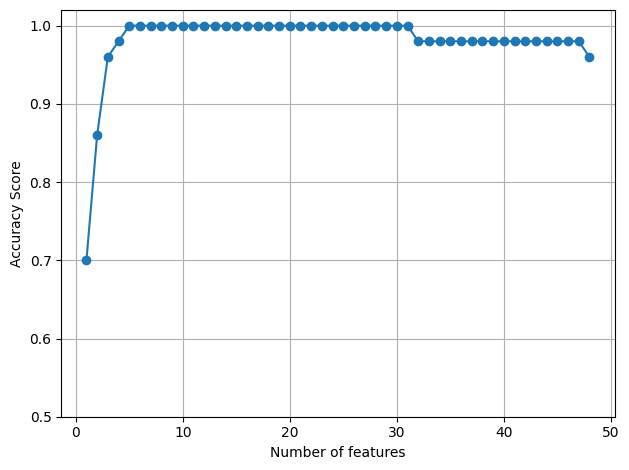

In [640]:
print('your code here')

# Create a KNN classifier with n=3
knn = KNeighborsClassifier(n_neighbors=3)
# Create a FeatureSelector instance using your KNN
feature_selector = FeatureSelector(knn)
# Fit the FeatureSelector using your binned X_train and y_train
feature_selector.fit(X_train_eqfr, y_train)
# Plot the scores to determine how many features are needed for high accuracy
feature_selector.plot_scores()

> Note: you will likely score 100% relatively easy even with a small number of features.

This does not mean you have achieved a medical breakthrough... Sorry...
This is a very small data set meant for learning purposes. 100% accuracy just means your model has effectively memorized all the samples you are giving it. We will get to larger, more realistic datasets later in the term.

Select a value for $N$ that is safely within the range that yields maximum accuracy.

***SPOILER***
Your graph should be shaped similar to this. Some variation is okay, but the general shape should match. Feel free to direct message a screenshot of your graph to Orion to check your work.

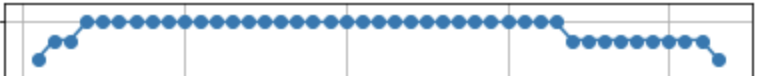

### 4.3 Model evaluation

Determine the training and test accuracies for
1. all features
2. the best $N$ selected features.

In [641]:
# creating a list of the 10 best features
best_10 = feature_selector.best_n_features(10)

# determining accuracy for all features
knn.fit(X_train_eqfr, y_train)
print('Training accuracy:', knn.score(X_train_eqfr, y_train))
print('Test accuracy:', knn.score(X_test_eqfr, y_test))

print()

# determining accuracy for best 10 features
knn.fit(X_train_eqfr[:, best_10], y_train)
print('Training accuracy:', knn.score(X_train_eqfr[:, best_10], y_train))
print('Test accuracy:', knn.score(X_test_eqfr[:, best_10], y_test))

Training accuracy: 0.96
Test accuracy: 1.0

Training accuracy: 1.0
Test accuracy: 0.9545454545454546


***
## <img src="https://img.icons8.com/color/32/000000/new-document.png"/> Section 4 - Report

Answer the following questions below:
1. Which discretization approach did you choose? equal-width or equal-frequency? Why?
1. Describe what the FeatureSelector is doing. Explain what the final graph provided by `plot_scores` means.
1. How many features did you select?  Why did you determine that particular value for $N$?
1. `[Plot]` Make a pair-plot of your $N$ selected features.
1. `[Table]` In markup, make a $3\times3$ table that compares your training/testing accuracy for each experiment.
  1. all features
  2. best $N$ features
  * Explain your results

| Experiment  | Train      | Test        |
| ----------- | ---------- | ----------- |
| All features|   ???      |     ???     |
| Best $N$    |   ???      |     ???     |

### <img src="https://img.icons8.com/color/32/000000/speech-bubble-with-dots.png"/> **Student Response**


1. I chose to use an equal frequency bin discretization as the values in the bin would be much more evenly distributed. This even(ish) distribution means the bins will likely have more significance in representing the underlying distribution. Plus, i tried both and equal frequency produced better results.

2. The FeatureSelector is making every possible subset of features of every possible and then scoring them. It then saves the subset of each size which scores the highest in a list along with the scores of those subsets in another list. When we make our graph, we are looking at The score (represented on the y-axis) of each optimal subset for each size (represented on the x-axis) This allows us to pick a subset that will hopefully give us optimal results in testing.

3. I selected 10 features as that subset scored 100% and it seems to be in a very stable part of the graph, meaning it is a safe bet.

4. See pair plot below:

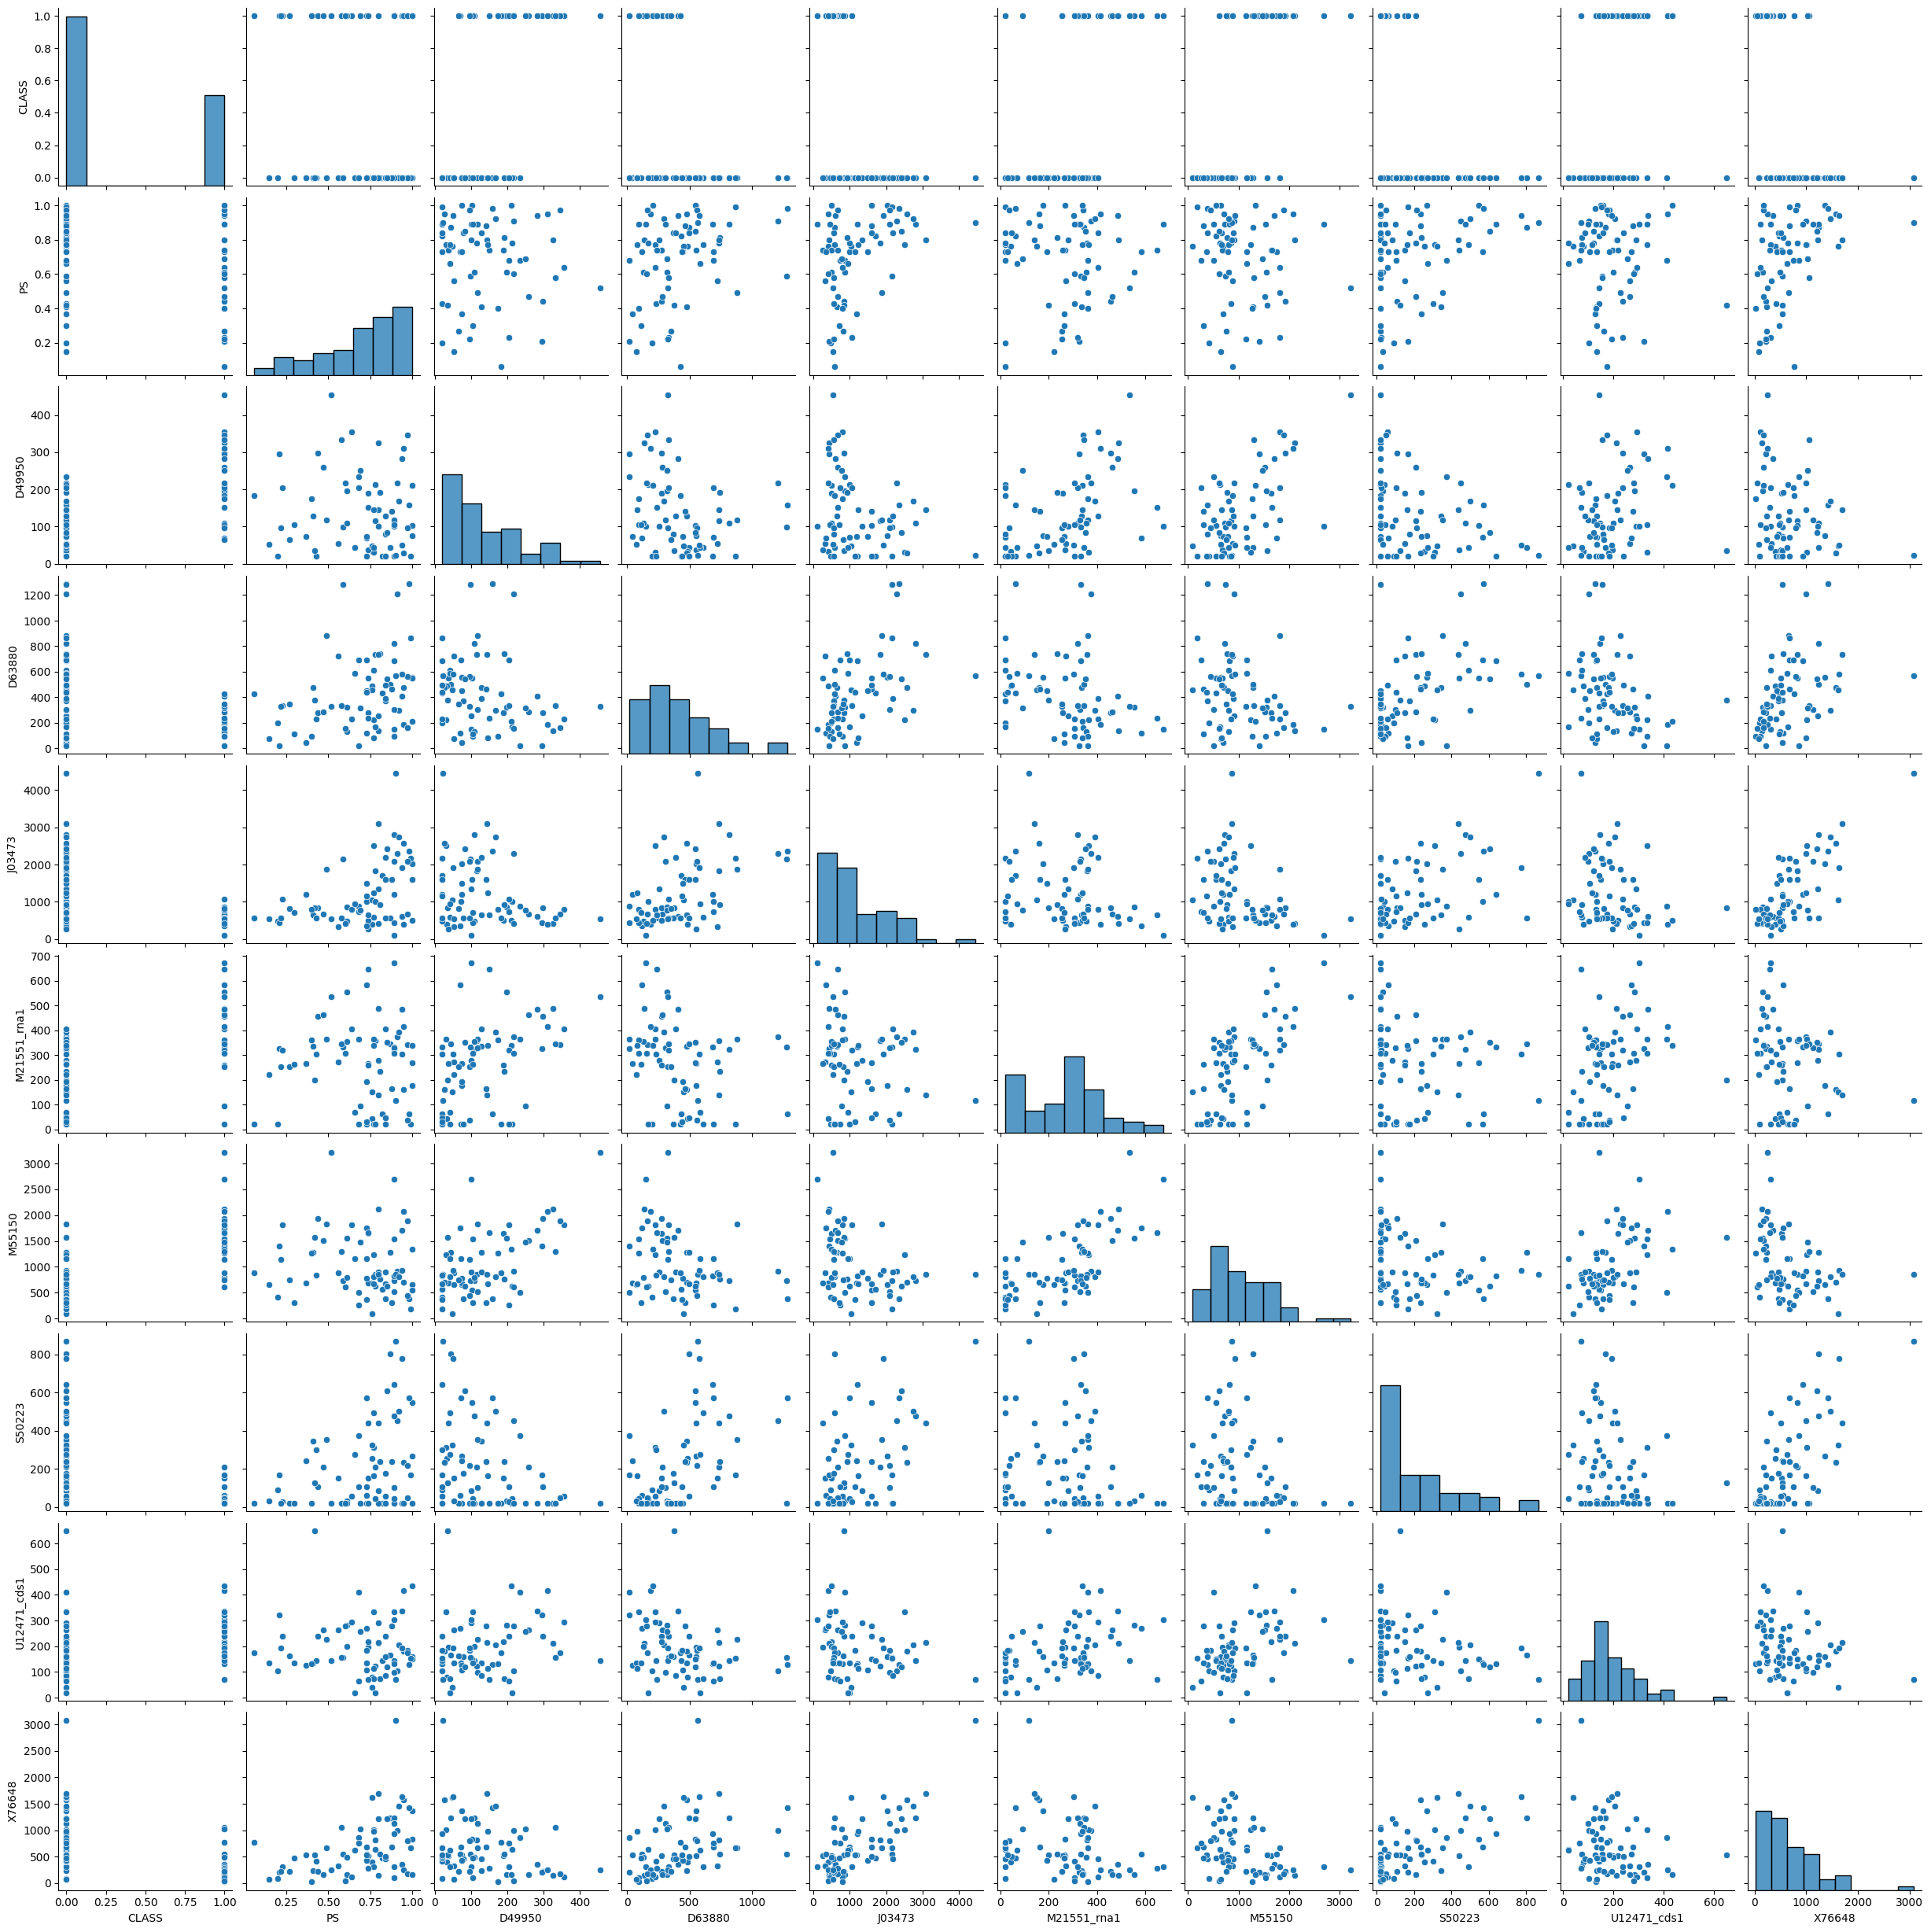

In [645]:
best_10_columns = list(feature_selector.subsets_[38])
sns.pairplot(df2.iloc[:, best_10_columns])

5. See table below:

|Experiment|Train|Test|
|----------|-----|----|
|All Features|0.96|1.0|
|N Features|1.0|0.95|

When all features were used on the training set, we got a 96% accuracy score which aligns with the graph in section 4.2. The last point on that graph for 48 features is sitting on 0.96. Our Test data was 1.0 or 100% accuracy This is likely because our test data is a different and smaller set than our training data and therefore we can not always expect the same result. There are 22 records in our test data versus 50 in our train data. When we picked our N best features we were picking based on a graph showing us the training accuracy of those features. So in N-Features train we got 1.0 or 100% accuracy. However, again, the testing data is a different and smaller set so our training accuracy does not guarantee 100% we instead ended up with 95% which is still a good predictor.